# 1. melt 메서드
## 1-0. melt메서드란?
공통된 느낌을 갖는 여러 컬럼을 묶어서 하나의 열로 나타낸다 -> 열 개수를 줄일 수 있음.

<font color="blue">칼럼을 녹여서 행으로 보낸다</font> 라는 뉘앙스로 이해하자


## 1-1. 1개의 열만 고정하고 나머지 열을 행으로 바꾸기
- 퓨 리서치 센터에서 조사한 '미국의 소득과 종교'데이터
- 데이터프레임의 열은 열 자체가 어떤값
- 데이터프레임의 열이 옆으로 길게 늘어선 형태

In [1]:
import pandas as pd
pew = pd.read_csv('data/pew.csv')

#### melt메서드 인자
- id_vars : 위치를 그대로 유지할 열의 이름을 지정
- value_vars : 행으로 위치를 변경할 열의 이름을 지정
- var_name : value_vars로 위치를 변경할 열의 이름을 저장
- value_name으로 위치를 변경할 열의 데이터를 저장할 열의 이름을 지정


In [2]:
pew.head(3)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54


In [9]:
pew.iloc[:,0:6]

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k
0,Agnostic,27,34,60,81,76
1,Atheist,12,27,37,52,35
2,Buddhist,27,21,30,34,33
3,Catholic,418,617,732,670,638
4,Don’t know/refused,15,14,15,11,10
5,Evangelical Prot,575,869,1064,982,881
6,Hindu,1,9,7,9,11
7,Historically Black Prot,228,244,236,238,197
8,Jehovah's Witness,20,27,24,24,21
9,Jewish,19,19,25,25,30


In [11]:
# religion열을 고정하여 피벗했다.
pew_long = pd.melt(pew, id_vars='religion')
pew_long.head()

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


In [13]:
# religion을 고정. 변수이름을icome. 값이름을 count
pew_long = pd.melt(pew, id_vars='religion', var_name='income', value_name='count')
pew_long

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


## 1-2.  2개 이상의 열을 고정하고 나머지 열을 행으로 바꾸기

In [15]:
billboard = pd.read_csv('data/billboard.csv')
billboard.iloc[0:5,0:16]

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,wk10,wk11
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,94.0,99.0,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,57.0,54.0,53.0,51.0,51.0,51.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,65.0,55.0,59.0,62.0,61.0,61.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,31.0,36.0,49.0,53.0,57.0,64.0


In [16]:
billboard_long = pd.melt(billboard
                         , id_vars=['year','artist','track','time','date.entered']
                         , var_name='week'
                         , value_name='rating')
billboard_long.head(3)

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0


## 1-3.ebola 데이터 집합 살펴보기

In [17]:
ebola = pd.read_csv('data/country_timeseries.csv')
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [19]:
# Cases_Guinea : 발병국가 Deaths_Guinea : 사망자수
# 열이 의미를 가지고 있다.
ebola.head()
print(ebola.iloc[:5, [0, 1, 2, 3, 10, 11]])

         Date  Day  Cases_Guinea  Cases_Liberia  Deaths_Guinea  Deaths_Liberia
0    1/5/2015  289        2776.0            NaN         1786.0             NaN
1    1/4/2015  288        2775.0            NaN         1781.0             NaN
2    1/3/2015  287        2769.0         8166.0         1767.0          3496.0
3    1/2/2015  286           NaN         8157.0            NaN          3496.0
4  12/31/2014  284        2730.0         8115.0         1739.0          3471.0


In [24]:
ebola_long = pd.melt(ebola, id_vars=['Date','Day'])
print(ebola_long.head())
print(ebola_long.tail())

         Date  Day      variable   value
0    1/5/2015  289  Cases_Guinea  2776.0
1    1/4/2015  288  Cases_Guinea  2775.0
2    1/3/2015  287  Cases_Guinea  2769.0
3    1/2/2015  286  Cases_Guinea     NaN
4  12/31/2014  284  Cases_Guinea  2730.0
           Date  Day     variable  value
1947  3/27/2014    5  Deaths_Mali    NaN
1948  3/26/2014    4  Deaths_Mali    NaN
1949  3/25/2014    3  Deaths_Mali    NaN
1950  3/24/2014    2  Deaths_Mali    NaN
1951  3/22/2014    0  Deaths_Mali    NaN


## 1-4.열 이름 분리하고 데이터프레임에 추가하기

In [25]:
# '-'를 기준으로 분리
variable_split = ebola_long.variable.str.split('_')
print(variable_split)

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: variable, Length: 1952, dtype: object


In [34]:
# get메서드를 사용하여 0,1번째 인덱스의 데이터 추출
status_values = variable_split.str.get(0)
country_values = variable_split.str.get(1)

In [32]:
# head()
status_values[:5]
# tail()
status_values[-5:]

1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, dtype: object

In [37]:
ebola_long['status'] = status_values
ebola_long['country'] = country_values
ebola_long.head()

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


## 1-5. concat 메서드를 응용하여 데이터프레임에 열 추가하기

In [40]:
# concat메서드를 활용하면 split 메서드로 분리한 데이터를 바로 df에 추가할 수 있다.
variable_split = ebola_long.variable.str.split('_', expand=True)
variable_split.columns = ['status','country']
ebola_parsed = pd.concat([ebola_long, variable_split], axis=1)
ebola_parsed

,Date,Day,variable,value,status,country,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea,Cases,Guinea
...,...,...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali,Deaths,Mali


## 1-6. 기상 데이터의 여러 열을 하나로 정리하기 ─ melt, pivot_table 메서드

In [45]:
weather = pd.read_csv('data/weather.csv')
weather.shape # (22x35)
weather.iloc[:5,:11]

,id,year,month,element,d1,d2,d3,d4,d5,d6,d7
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,NaN


In [68]:
weather_melt = pd.melt(weather, id_vars=['id', 'year', 'month', 'element'], var_name='day', value_name='temp') 
print(weather_melt.head())

        id  year  month element day  temp
0  MX17004  2010      1    tmax  d1   NaN
1  MX17004  2010      1    tmin  d1   NaN
2  MX17004  2010      2    tmax  d1   NaN
3  MX17004  2010      2    tmin  d1   NaN
4  MX17004  2010      3    tmax  d1   NaN


In [66]:
weather_tidy = weather_melt.pivot_table(index=['id', 'year', 'month', 'day']
                                        , columns='element'
                                        , values='temp'
)
print(weather_tidy.columns)
weather_tidy

Index(['tmax', 'tmin'], dtype='object', name='element')


element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d2   31.3  16.3
                   d5   26.3   7.9
                   d27  27.7  14.2
                   d26  28.1  12.1
                   d4   27.2  12.0
             12    d1   29.9  13.8
                   d6   27.8  10.5

In [62]:
# reset_index : 기존의 행 인덱스를 제거, 새로 지정
weather_tidy_flat = weather_tidy.reset_index() 
print(weather_tidy_flat.head())

element       id  year  month  day  tmax  tmin
0        MX17004  2010      1  d30  27.8  14.5
1        MX17004  2010      2  d11  29.7  13.4
2        MX17004  2010      2   d2  27.3  14.4
3        MX17004  2010      2  d23  29.9  10.7
4        MX17004  2010      2   d3  24.1  14.4


## 1-7.pivot_table이해하기: 데이터정리

In [73]:
practice = pd.read_csv('data/practice.csv', index_col=0, encoding='UTF-8')
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0


In [74]:
practice.loc[6] = ['19-3-4','걷기',1.5]
practice.loc[7] = ['19-3-5','달리기',1]
practice.loc[8] = ['19-3-6','걷기',2.5]
practice.loc[9] = ['19-3-6','달리기',0.5]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0
6,19-3-4,걷기,1.5
7,19-3-5,달리기,1.0
8,19-3-6,걷기,2.5
9,19-3-6,달리기,0.5


In [81]:
# 운동카테고리에 따라 평균냄 (default: 평균)
practice.pivot_table(index='운동') 

,양
운동,
걷기,1.625
계단오르기,1.000
달리기,0.900


In [80]:
# 합계
import numpy as np
practice.pivot_table(index='운동', aggfunc=np.sum) 

,양
운동,
걷기,6.5
계단오르기,1.0
달리기,4.5


In [83]:
practice.pivot_table(index='운동',aggfunc=[np.sum, len])

sum len     
         양  날짜    양
운동                 
걷기     6.5   4  4.0
계단오르기  1.0   1  1.0
달리기    4.5   5  5.0

In [86]:
practice.pivot('날짜','운동','양')

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,NaN,NaN,1.0
19-3-2,1.0,1.0,1.0
19-3-3,1.5,NaN,1.0
19-3-4,1.5,NaN,NaN
19-3-5,NaN,NaN,1.0
19-3-6,2.5,NaN,0.5


## 1-8. 빌보드 차트의 중복 데이터 처리하기

In [114]:
billboard = pd.read_csv('data/billboard.csv')
billboard.shape # 317 X 8
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
id_vars = ['year','artist','track','time','date.entered']
billboard_long = pd.melt(billboard, id_vars=id_vars
                        , var_name='week', value_name='rating')
billboard_long.shape

(24092, 7)

In [98]:
# 제목이 Loser인 데이터
billboard_long[billboard_long.track == 'Loser'].head()

,year,artist,track,time,date.entered,week,rating
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
320,2000,3 Doors Down,Loser,4:24,2000-10-21,wk2,76.0
637,2000,3 Doors Down,Loser,4:24,2000-10-21,wk3,72.0
954,2000,3 Doors Down,Loser,4:24,2000-10-21,wk4,69.0
1271,2000,3 Doors Down,Loser,4:24,2000-10-21,wk5,67.0


In [107]:
# 중복 데이터를 가지고 있는 ['year', 'artist', 'track', 'time']를 따로 모아 df로 저장
billboard_songs = billboard_long[id_vars[:-1]] 
print(billboard_songs.shape)

(24092, 4)


In [109]:
# drop_duplicates메서드로 df의 중복 데이터를 제거합니다.
billboard_songs = billboard_songs.drop_duplicates()
billboard_songs.shape

(317, 4)

In [116]:
billboard_songs['id'] = range(len(billboard_songs))
billboard_songs

,year,artist,track,time,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,1
2,2000,3 Doors Down,Kryptonite,3:53,2
3,2000,3 Doors Down,Loser,4:24,3
4,2000,504 Boyz,Wobble Wobble,3:35,4
...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,312
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,313
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,314
315,2000,Zombie Nation,Kernkraft 400,3:30,315


In [117]:
billboard_ratings = billboard_long.merge(billboard_songs
                                         , on=['year','artist','track','time'])
billboard_ratings

,year,artist,track,time,date.entered,week,rating,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,0
1,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0,0
2,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0,0
3,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0,0
4,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0,0
...,...,...,...,...,...,...,...,...
24087,2000,matchbox twenty,Bent,4:12,2000-04-29,wk72,NaN,316
24088,2000,matchbox twenty,Bent,4:12,2000-04-29,wk73,NaN,316
24089,2000,matchbox twenty,Bent,4:12,2000-04-29,wk74,NaN,316
24090,2000,matchbox twenty,Bent,4:12,2000-04-29,wk75,NaN,316


In [118]:
billboard_ratings[billboard_ratings.artist=='2 Pac']

,year,artist,track,time,date.entered,week,rating,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,0
1,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0,0
2,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0,0
3,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0,0
4,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0,0
...,...,...,...,...,...,...,...,...
71,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk72,NaN,0
72,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk73,NaN,0
73,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk74,NaN,0
74,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk75,NaN,0


## 연습문제

1. 데이터읽기
2. 12개csv, 1달동안 26개 구마다 미세먼지 위험수치
3. 구마다 위험수치(1,2,3,4)에 따른 빈도 

이렇게 결과가 나오면 되겠네?<br/>
도봉구 1.0 count<br/>
도봉구 2.0 count<br/>
도봉구 3.0 count<br/>
도봉구 4.0 count<br/>
동대문구 1.0 count<br/>
...

In [323]:
# 데이터 읽기
import glob
import pandas as pd
file_set = glob.glob('data/dust/*.csv')
file_list = []
# month 컬럼 추가
for idx, file_path in enumerate(file_set):
    file_list.append(pd.read_csv(file_path, encoding='cp949', index_col=0))
    m = file_path.split('_')[1].split('.')[0]
    file_list[idx]['month'] = m

file_list

[      ...1   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X23  X24  X25  \
 1   서울시 평균  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...    1    1    1   
 2      종로구  1.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  ...    1    1    1   
 3       중구  1.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  ...    1    1    1   
 4      용산구  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...    1    1    1   
 5      성동구  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...    1    1    1   
 6      광진구  2.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  ...    1    1    1   
 7     동대문구  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...    1    1    1   
 8      중랑구  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...    1    1    1   
 9      성북구  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...    1    1    1   
 10     강북구  2.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  ...    1    1    1   
 11     도봉구  2.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  ...    1    1    1   
 12     노원구  2.0  2.0  2.0  2.0  2.0  2.

In [324]:
# 합치기 -> 각 csv마다 누락된값들(4월은 3.0없음)이 있어서 합친후 작업
import pandas as pd
total_file_list = pd.concat(file_list)
total_file_list.head(3)

,...1,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,month
1,서울시 평균,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,4
2,종로구,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,4
3,중구,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,4


In [325]:
file_long_month = pd.melt(total_file_list, id_vars=['...1','month']
        ,var_name='day'
        ,value_name='danger')
file_long_month

,...1,month,day,danger
0,서울시 평균,4,X1,2.0
1,종로구,4,X1,1.0
2,중구,4,X1,1.0
3,용산구,4,X1,2.0
4,성동구,4,X1,2.0
...,...,...,...,...
9667,관악구,9,X31,NaN
9668,서초구,9,X31,NaN
9669,강남구,9,X31,NaN
9670,송파구,9,X31,NaN


In [330]:
file_long = file_long_month[file_long_month.columns.difference(['month'])]
file_long # month 컬럼 없음
df = pd.pivot_table(file_long, index=['...1','danger'], aggfunc=len).reset_index()
df


,...1,danger,day
0,강남구,0.0,64
1,강남구,1.0,141
2,강남구,2.0,138
3,강남구,3.0,22
4,강동구,0.0,30
...,...,...,...
99,중구,3.0,19
100,중랑구,0.0,68
101,중랑구,1.0,147
102,중랑구,2.0,130


In [327]:
# 폰트
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

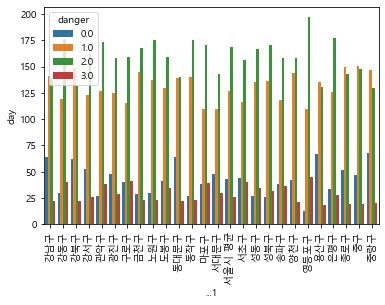

In [341]:
# 그래프
import seaborn as sns
ax = plt.subplots()
plt.xticks(rotation = - 270 ) # x축 텍스트 회전
ax = sns.barplot(x='...1', y='day', hue='danger', data=df)